In [1]:
### This code adds gaussian noise to nn-generated data. In its current version it generates 6 csv files: 3 for tanh, 3 for leaky_ReLU, with
#3 realizations of noise.
### The csv files are inputs for codes that compute traces of BMS and that train (other) neural networks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [5]:
function='tanh' #tanh, leaky_ReLU
 
realizations=3 #Noise realization. 0,1,2 unless otherwise specified 
sigma=0.16;mean=0; #sigma from 0 to 0.2 unless otherwise specified.

file_model='NN_function_' + function + '_NREP_10_data' + '.csv'
model_d='../data/generative_data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
sample=d.index.stop
print(d.index.stop)

noise = np.random.normal(mean,sigma,sample)

1600


In [6]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)

for realization in range(realizations):
    d.to_csv('../data/'+ 'NN_' + function + '_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.000000,0.0,0.096043,0.096043
1,-3.95,0.000344,0.0,0.060964,0.061308
2,-3.90,0.000711,0.0,-0.073949,-0.073238
3,-3.85,0.001102,0.0,0.035601,0.036704
4,-3.80,0.001519,0.0,0.062490,0.064009
...,...,...,...,...,...
1595,3.75,0.999019,9.0,0.151684,1.150704
1596,3.80,0.998911,9.0,0.148214,1.147125
1597,3.85,0.998800,9.0,0.053327,1.052126
1598,3.90,0.998686,9.0,0.290689,1.289376


,x1,y,rep,noise,y_noise
480,-4.00,1.000000,3.0,0.271998,1.271998
481,-3.95,0.996472,3.0,-0.016764,0.979708
482,-3.90,0.992702,3.0,-0.038975,0.953727
483,-3.85,0.988674,3.0,-0.237801,0.750873
484,-3.80,0.984369,3.0,0.115254,1.099622
...,...,...,...,...,...
635,3.75,0.192735,3.0,0.046787,0.239522
636,3.80,0.190693,3.0,-0.098949,0.091744
637,3.85,0.188696,3.0,0.331430,0.520126
638,3.90,0.186744,3.0,-0.091765,0.094979


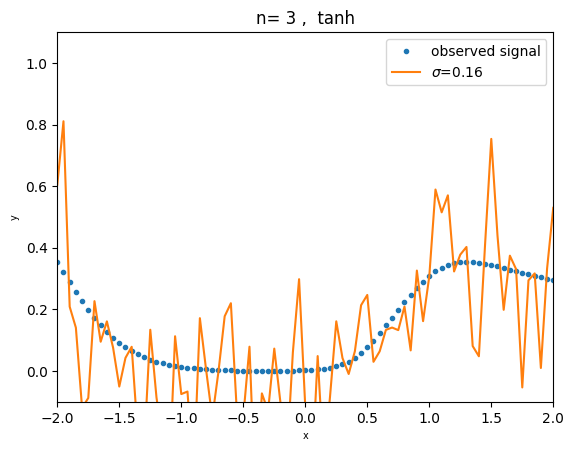

In [7]:
n=3
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed signal')
plt.plot(dn.x1,dn.y_noise,label='$\sigma$=' + str(sigma))
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

Name_figure='nn_' + function + '_sigma_' + str(sigma) + '_n_' + str(n) + '_r_' + str(realization)
plt.savefig('../results/' + Name_figure + '.png',dpi=300)